Đào Nguyễn Trung Hiếu

MSSV: 19146184

Lớp thứ 5 tiêt 12-15

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import numpy as np
from keras_preprocessing import image
import cv2
import os
import tensorflow as tf
import time
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Fruit/training',
                                                 target_size = (100, 100),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Fruit/testing',
                                            target_size = (100, 100),
                                            batch_size = 20,
                                            class_mode = 'categorical')
classes = ['Dâu tây','Dưa hấu','Măng cụt','Cam','Chanh','Chuối','Dứa','Khế','Táo','Xoài']


Found 500 images belonging to 10 classes.
Found 324 images belonging to 10 classes.


In [16]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
#tạo lớp ẩn
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))
#tạo lớp ẩn
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))
#tạo lớp ẩn
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
#model.summary()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(x=training_set,batch_size=20, epochs=200, validation_data=test_set, verbose=1)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/25 [==============================] - 8s 272ms/step - loss: 2.8424 - accuracy: 0.1440 - val_loss: 2.3683 - val_accuracy: 0.2068
Epoch 2/200
25/25 [==============================] - 7s 264ms/step - loss: 1.6606 - accuracy: 0.3720 - val_loss: 5.7267 - val_accuracy: 0.1142
Epoch 3/200
25/25 [==============================] - 6s 260ms/step - loss: 1.4475 - accuracy: 0.5180 - val_loss: 6.3176 - val_accuracy: 0.0772
Epoch 4/200
25/25 [==============================] - 6s 259ms/step - loss: 1.0395 - accuracy: 0.6120 - val_loss: 6.3424 - val_accuracy: 0.0926
Epoch 5/200
25/25 [==============================] - 6s 263ms/step - loss: 0.9290 - accuracy: 0.6960 - val_loss: 5.9067 - val_accuracy: 0.0926
Epoch 6/200
25/25 [==============================] - 6s 258ms/step - loss: 0.8242 - accuracy: 0.7040 - val_loss: 5.5858 - val_accuracy: 0.0833
Epoch 7/200
25/25 [==============================] - 6s 263ms/step - loss: 0.6659 - accuracy: 0.7500 - val_loss: 7.0032 - val_accuracy: 0.0988
Epoch 8/200

In [18]:
model.save("Fruit_CNN.h5")

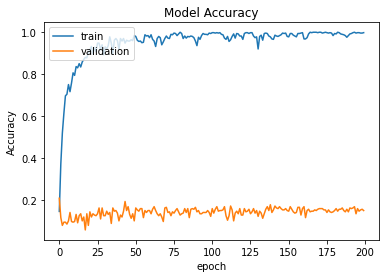

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

Cam


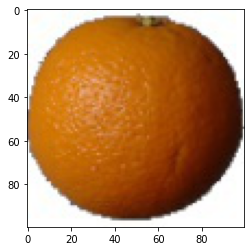

In [21]:
from tensorflow.keras.models import load_model

classes = ['Dâu tây','Dưa hấu','Măng cụt','Cam','Chanh','Chuối','Dứa','Khế','Táo','Xoài']
new_model = load_model('Fruit_CNN.h5')
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img=load_img('/content/drive/MyDrive/Dataset/Fruit/Test_Pic/Orange.jpg',target_size=(100,100))
plt.imshow(img)
img=img_to_array(img)
img = np.expand_dims(img, axis=0)

result = new_model.predict(img)
result1 = result[0]
for y in range(10):
  if result1[y] == 1.:
    break
prediction = classes[y]
print(prediction)
    